In [2]:
!ls ../Datos/OwnFats/

koi_light_curves_FATS2_metadata_test.csv
koi_light_curves_FATS2_metadata_test_model.csv
koi_light_curves_FATS2_metadata_test_model_p_error.csv
koi_light_curves_FATS2_metadata_test_p_error.csv
koi_light_curves_FATS2_metadata_train.csv
koi_light_curves_FATS2_metadata_train_model.csv
koi_light_curves_FATS2_metadata_train_model_p_error.csv
koi_light_curves_FATS2_metadata_train_p_error.csv


In [1]:
#metricas de evaluacion
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def calculate_metrics(y_true,y_pred):
    f1 = f1_score(y_true,y_pred,average="weighted")
    p = precision_score(y_true,y_pred,average=None,labels=[0,1]) #1 confirmado y 0 false positivo
    r = recall_score(y_true,y_pred,average=None,labels=[0,1])
    return f1,p,r

In [2]:
df_sets = pd.read_csv("../Datos/koi_sets_unb.csv") #new test set
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
#fijo para todos los datos
df_labels = pd.read_csv("../Datos/koi_metadata.csv")
df_labels_train = df_labels[mask_train]
df_labels_test = df_labels[mask_test]

In [3]:
y_train = ((df_labels_train["NExScI Disposition"]=="CONFIRMED")*1).values
y_test = ((df_labels_test["NExScI Disposition"]=="CONFIRMED")*1).values
df_labels_train.head()

,KOI Name,NExScI Disposition,Kepler Name,Period,Time of Transit Epoch,First Transit Time (BJD),Impact Parameter,Duration,Transit Depth,r/R,...,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count,Transit Number
1,K01009.01,FALSE POSITIVE,NaN,5.092465,357.53594,2455190.536,0.161,3.65900,254.0,0.014,...,5037.0,4.547,-0.20,0.751,0.727,3.648,15.175,17.1,1,225
2,K07621.01,FALSE POSITIVE,NaN,275.073650,315.24860,2455148.249,0.595,3.37000,228.9,0.014,...,5604.0,4.226,-0.12,1.187,0.864,5.909,8.012,7.5,1,4
3,K06252.01,FALSE POSITIVE,NaN,8.460439,133.77449,2454966.774,1.061,4.73492,76412.9,0.478,...,5951.0,4.638,-1.06,0.702,0.796,452.526,3704.503,1797.4,1,164
6,K04162.01,FALSE POSITIVE,NaN,0.539366,131.97457,2454964.975,0.988,5.43400,145.0,0.016,...,6341.0,3.301,-0.10,5.302,2.050,4.847,9.076,57.6,1,1239
9,K00998.01,FALSE POSITIVE,NaN,161.788327,214.03900,2455047.039,0.267,5.31000,87750.0,0.273,...,6018.0,4.327,0.18,1.212,1.142,341.666,806.993,704.5,1,9


In [4]:
todos_ceros = np.zeros(y_test.shape)
todos_uno = np.ones(y_test.shape)

print("Score si dice todos son falsos positivos: %f"%f1_score(y_test,todos_ceros,average="weighted"))
print("Score si dice todos son confirmados: %f"%f1_score(y_test,todos_uno,average="weighted"))

Score si dice todos son falsos positivos: 0.547014
Score si dice todos son confirmados: 0.157445


/users/fmena/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/users/fmena/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


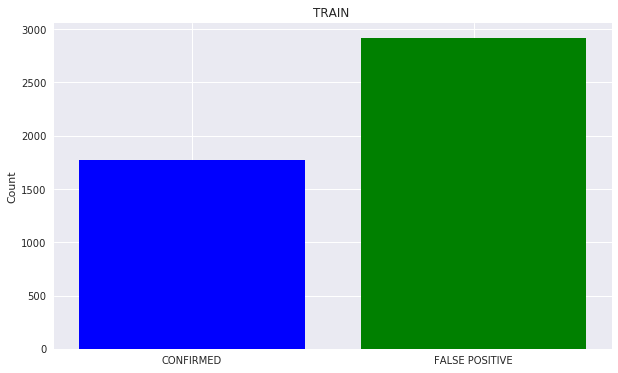

In [5]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("TRAIN ")
plt.bar(0, np.sum(y_train==1),color="blue")
plt.bar(1, np.sum(y_train==0),color="green")
plt.xticks([0,1],["CONFIRMED","FALSE POSITIVE"])
plt.ylabel("Count")

## VARIAR REPRESENTACION ACA:

In [4]:
#para distintas representaciones...
#df_rep_train = pd.read_csv('../Datos/OwnFats_unb/koi_light_curves_FATS2_metadata_train_p_error.csv') #raw 
df_rep_train = pd.read_csv('../Datos/OwnFats_unb/koi_light_curves_FATS2_metadata_train_model_p_error.csv') #model
#df_rep_test = pd.read_csv('../Datos/OwnFats_unb/koi_light_curves_FATS2_metadata_test_p_error.csv') #raw
df_rep_test = pd.read_csv('../Datos/OwnFats_unb/koi_light_curves_FATS2_metadata_test_model_p_error.csv') #model

#para fats2 
df_rep_train.fillna(df_rep_train.median(), inplace=True)
df_rep_test.fillna(df_rep_test.median(), inplace=True)
X_train = df_rep_train.values[:,:-1]
X_test = df_rep_test.values[:,:-1]

columns_names = df_rep_train.columns[:-1]

print(X_train.shape)

(4692, 72)


In [5]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
Xstd_train = std.fit_transform(X_train.astype('float'))
Xstd_test = std.transform(X_test)

/users/fmena/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Start training models

In [93]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, f1_score, recall_score, accuracy_score, precision_score

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score_we':make_scorer(f1_score,average='weighted'),
    'f1_score_macro':make_scorer(f1_score,average='macro'),
    'f1_score_micro':make_scorer(f1_score,average='micro')
}

In [113]:
#FEATURES TO SELECT
topK = 25

## FSS (Feature stepwise selection)
---
### Base model to select: SVM

In [7]:
from sklearn.svm import SVC
clf = SVC(cache_size=20000) #high ram
param_grid = {
    'C' : [10**i for i in np.arange(-5,5)],
    'kernel':['poly','rbf','sigmoid'],
    'class_weight' : ['balanced',None]
}

skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit='f1_score_we',
                       cv=skf, return_train_score=False, n_jobs=-1)
grid_search.fit(Xstd_train, y_train)
print('Best params:', grid_search.best_params_)

/users/fmena/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/users/fmena/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best params: {'C': 10, 'class_weight': None, 'kernel': 'rbf'}


In [16]:
((3.5*70)*25)/3600

1.7013888888888888

In [13]:
def fss(model,x, y, names_x, k = 10000):
    p = x.shape[1]
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = []
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            
            #with cross validation
            skf = StratifiedKFold(n_splits=5)
            aux = cross_validate(model, x_train,y, scoring='f1_weighted',cv=skf, n_jobs=-1)
            error_metrica = 1- np.mean(aux["test_score"])
            score_candidates.append((error_metrica, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print("selected = %s ..."%names_x[best_candidate])
        print("totalvars=%d, error = %f"%(len(indexes),best_new_score))
    return selected

model = SVC(**grid_search.best_params_,cache_size=50000)
top_features_fss = fss(model, Xstd_train, y_train, columns_names, k=25)
top_features_fss

SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI
SI


KeyboardInterrupt: 

In [ ]:
print(np.max(top_features_fss))
print(np.min(top_features_fss))
print(Xstd_train.shape)

In [20]:
#train again with FSS features
selected_features_fss = top_features_fss[:topK]
print("Selected Features:",columns_names[selected_features_fss])
Xstd_train_fss = Xstd_train[:,selected_features_fss]
Xstd_test_fss = Xstd_test[:,selected_features_fss]

NameError: name 'top_features' is not defined

## Feature Importance
---
### Base model to select: Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1, random_state=0)

param_grid = {
    'n_estimators' : [10,20,30,40,50,60,70,80,90,100],
    'min_samples_split': [2,5,10,15,20,25],
    'class_weight' : ['balanced','balanced_subsample',None]
}

skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit='f1_score_we',
                       cv=skf, return_train_score=False, n_jobs=-1)
grid_search.fit(Xstd_train, y_train)

print('Best params:', grid_search.best_params_)

Best params: {'class_weight': None, 'min_samples_split': 5, 'n_estimators': 90}


/users/fmena/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


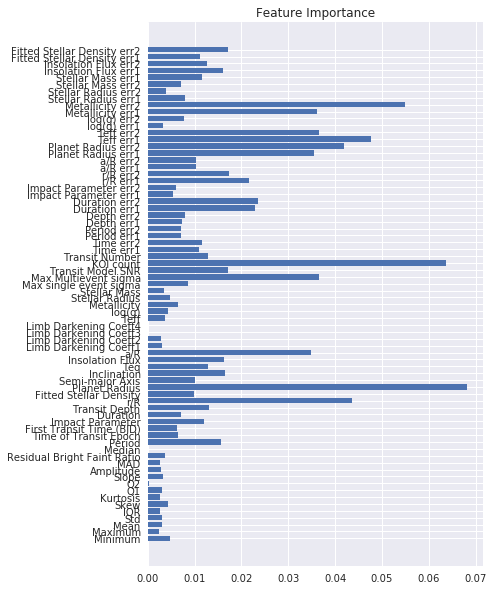

In [24]:
#Feature IMportance
feat_imp = []
for i in range(20):
    model = RandomForestClassifier(n_jobs=-1,**grid_search.best_params_)
    model.fit(Xstd_train,y_train) 
    feat_imp.append(model.feature_importances_)
feat_imp = np.mean(feat_imp,axis=0)

plt.figure(figsize=(6,10))
plt.barh(range(len(columns_names)), feat_imp)
plt.yticks(range(len(columns_names)),columns_names)#, rotation= 30)
plt.title('Feature Importance')
plt.show()

/users/fmena/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


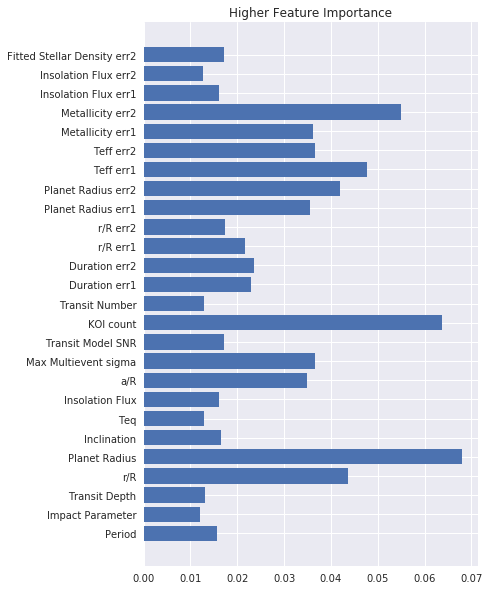

In [114]:
most_relevant = feat_imp >= np.sort(feat_imp)[::-1][topK] #mask
plt.figure(figsize=(6,10))
plt.barh(range(len(columns_names[most_relevant])), feat_imp[most_relevant])
plt.yticks(range(len(columns_names[most_relevant])),columns_names[most_relevant])#, rotation= 30)
plt.title('Higher Feature Importance')
plt.show()

top_features_RF = np.argsort(feat_imp)[::-1]
selected_features_RF =top_features_RF[:topK]

Xstd_train_rf = Xstd_train[:,selected_features_RF]
Xstd_test_rf = Xstd_test[:,selected_features_RF]

### Input to use:

In [115]:
#Xtrain_used = Xstd_train.copy()
#Xtest_used = Xstd_test.copy()

Xtrain_used = Xstd_train_rf.copy()
Xtest_used = Xstd_test_rf.copy()
Xtrain_used.shape

(4692, 25)

## K-NN

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise

clf = KNeighborsClassifier(n_jobs=-1)

param_grid = {
    'n_neighbors' : np.arange(3,35),
    'weights': ["uniform","distance"],
    'metric': ['euclidean', 'cosine']
}

skf = StratifiedKFold(n_splits=5)
grid_search_knn = GridSearchCV(clf, param_grid, scoring=scorers, refit='f1_score_we',
                       cv=skf, return_train_score=False, n_jobs=-1)
grid_search_knn.fit(Xtrain_used, y_train)

print('Best params:', grid_search_knn.best_params_)
results = pd.DataFrame(grid_search_knn.cv_results_)
bestResults = results[results.params == grid_search_knn.best_params_]
preci = float(bestResults['mean_test_precision_score'])
print('Contamination: {:.4f}'.format(preci))
f1_w = float(bestResults['mean_test_f1_score_we'])
print('F1-score weighted: {:.4f}'.format(f1_w))
f1_ma = float(bestResults['mean_test_f1_score_macro'])
print('F1-score macro: {:.4f}'.format(f1_ma))
f1_mi = float(bestResults['mean_test_f1_score_micro'])
print('F1-score micro: {:.4f}'.format(f1_mi))

Best params: {'metric': 'cosine', 'n_neighbors': 10, 'weights': 'uniform'}
Contamination: 0.8666
F1-score weighted: 0.9104
F1-score macro: 0.9052
F1-score micro: 0.9101


## SVM with kernels

In [117]:
from sklearn.svm import SVC
clf = SVC(cache_size=20000) #high ram

param_grid = {
    'C' : [10**i for i in np.arange(-5,5)],
    'kernel':['poly','rbf','sigmoid'],
    'class_weight' : ['balanced',None]
}

skf = StratifiedKFold(n_splits=5)
grid_search_svm = GridSearchCV(clf, param_grid, scoring=scorers, refit='f1_score_we',
                       cv=skf, return_train_score=False, n_jobs=-1)
grid_search_svm.fit(Xtrain_used, y_train)

print('Best params:', grid_search_svm.best_params_)
results = pd.DataFrame(grid_search_svm.cv_results_)
bestResults = results[results.params == grid_search_svm.best_params_]
completeness = float(bestResults['mean_test_recall_score'])
print('Completion: {:.4f}'.format(completeness))
preci = float(bestResults['mean_test_precision_score'])
print('Contamination: {:.4f}'.format(preci))
f1_w = float(bestResults['mean_test_f1_score_we'])
print('F1-score weighted: {:.4f}'.format(f1_w))
f1_ma = float(bestResults['mean_test_f1_score_macro'])
print('F1-score macro: {:.4f}'.format(f1_ma))
f1_mi = float(bestResults['mean_test_f1_score_micro'])
print('F1-score micro: {:.4f}'.format(f1_mi))

/users/fmena/.local/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/users/fmena/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best params: {'C': 100, 'class_weight': None, 'kernel': 'rbf'}
Completion: 0.9161
Contamination: 0.8876
F1-score weighted: 0.9246
F1-score macro: 0.9201
F1-score micro: 0.9243


## Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1, random_state=0)

param_grid = {
    'n_estimators' : [10,20,30,40,50,60,70,80,90,100],
    'min_samples_split': [2,5,10,15,20,25],
    #'max_depth': np.arange(5,25),
    'class_weight' : ['balanced','balanced_subsample',None]
}

skf = StratifiedKFold(n_splits=5)
grid_search_rf = GridSearchCV(clf, param_grid, scoring=scorers, refit='f1_score_we',
                       cv=skf, return_train_score=False, n_jobs=-1)
grid_search_rf.fit(Xtrain_used, y_train)

print('Best params:', grid_search_rf.best_params_)
results = pd.DataFrame(grid_search_rf.cv_results_)
bestResults = results[results.params == grid_search_rf.best_params_]
completeness = float(bestResults['mean_test_recall_score'])
print('Completion: {:.4f}'.format(completeness))
preci = float(bestResults['mean_test_precision_score'])
print('Contamination: {:.4f}'.format(1-preci))
f1_w = float(bestResults['mean_test_f1_score_we'])
print('F1-score weighted: {:.4f}'.format(f1_w))
f1_ma = float(bestResults['mean_test_f1_score_macro'])
print('F1-score macro: {:.4f}'.format(f1_ma))
f1_mi = float(bestResults['mean_test_f1_score_micro'])
print('F1-score micro: {:.4f}'.format(f1_mi))

Best params: {'class_weight': 'balanced_subsample', 'min_samples_split': 2, 'n_estimators': 100}
Completion: 0.9093
Contamination: 0.0700
F1-score weighted: 0.9395
F1-score macro: 0.9356
F1-score micro: 0.9397


In [82]:
%%time
#grafico de numero de caract a escoger vs val error...
skf = StratifiedKFold(n_splits=5)
train_f1 = []
cv_f1 = [] #cross validation
to_try = 40

for k in range(1,to_try+1): #muchas?
    #select k
    #based on FSS
    #selected_features = top_features_fss[:k]
    
    #based on RF
    selected_features = top_features_RF[:k]
    
    Xstd_train_plot = Xstd_train[:,selected_features]
    Xstd_test_plot = Xstd_test[:,selected_features]

    #entrenar y medir f1
    model = KNeighborsClassifier(n_jobs=-1,**grid_search_knn.best_params_)
    aux = cross_validate(model, Xstd_train_plot, y_train, scoring='f1_weighted',cv=skf, n_jobs=-1)
    f1_val_1 = np.mean(aux["test_score"])
    f1_train_1 = np.mean(aux["train_score"])
    
    model = SVC(cache_size=50000, **grid_search_svm.best_params_)
    aux = cross_validate(model, Xstd_train_plot, y_train, scoring='f1_weighted',cv=skf, n_jobs=-1)
    f1_val_2 = np.mean(aux["test_score"])
    f1_train_2 = np.mean(aux["train_score"])
    
    
    model = RandomForestClassifier(n_jobs=-1,**grid_search_rf.best_params_)
    aux = cross_validate(model, Xstd_train_plot, y_train, scoring='f1_weighted',cv=skf, n_jobs=-1)
    f1_val_3 = np.mean(aux["test_score"])
    f1_train_3 = np.mean(aux["train_score"])
    
    train_f1.append([f1_train_1,f1_train_2,f1_train_3])
    cv_f1.append([f1_val_1,f1_val_2,f1_val_3])
    
train_f1 = np.asarray(train_f1)
cv_f1 = np.asarray(cv_f1)
print("Done")

/users/fmena/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/users/fmena/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/users/fmena/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/users/fmena/.local/lib/python3.6/site-packages/sklearn/utils

Done
CPU times: user 4.11 s, sys: 1.72 s, total: 5.84 s
Wall time: 2min 17s


/users/fmena/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


/users/fmena/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


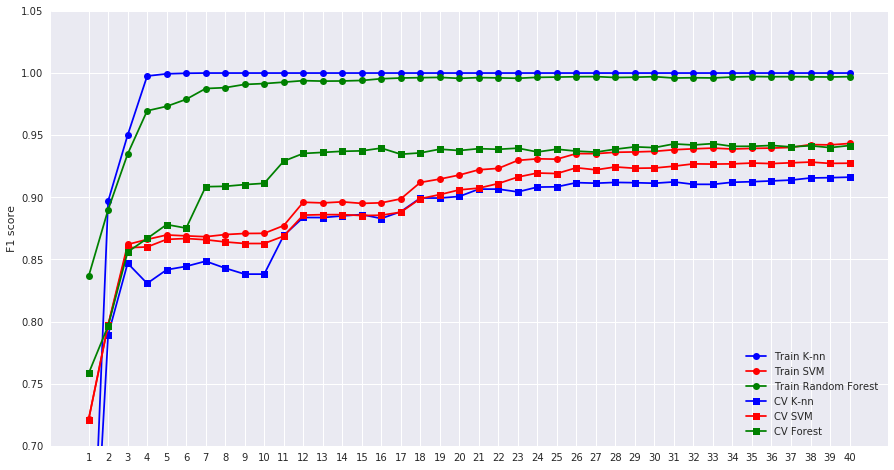

Index(['Planet Radius', 'KOI count', 'Metallicity err2', 'Teff err1', 'r/R',
       'Planet Radius err2', 'Max Multievent sigma', 'Teff err2',
       'Metallicity err1', 'Planet Radius err1', 'a/R', 'Duration err2',
       'Duration err1', 'r/R err1', 'r/R err2', 'Transit Model SNR',
       'Fitted Stellar Density err2', 'Inclination', 'Insolation Flux',
       'Insolation Flux err1', 'Period', 'Transit Depth', 'Transit Number',
       'Teq', 'Insolation Flux err2', 'Impact Parameter', 'Stellar Mass err1',
       'Time err2', 'Fitted Stellar Density err1', 'Time err1', 'a/R err2',
       'a/R err1', 'Semi-major Axis', 'Fitted Stellar Density',
       'Max single event sigma', 'Stellar Radius err1', 'Depth err2',
       'log(g) err2', 'Depth err1', 'Stellar Mass err2', 'Duration',
       'Period err2', 'Period err1', 'Time of Transit Epoch', 'Metallicity',
       'First Transit Time (BJD)', 'Impact Parameter err2',
       'Impact Parameter err1', 'Stellar Radius', 'Minimum', 'log(g)', '

In [91]:
x = np.arange(train_f1.shape[0])
plt.figure(figsize=(15,8))
plt.plot(x,train_f1[:,0],'bo-',label="Train K-nn")
plt.plot(x,train_f1[:,1],'ro-',label="Train SVM")
plt.plot(x,train_f1[:,2],'go-',label="Train Random Forest")

plt.plot(x,cv_f1[:,0],'bs-',label="CV K-nn")
plt.plot(x,cv_f1[:,1],'rs-',label="CV SVM")
plt.plot(x,cv_f1[:,2],'gs-',label="CV Forest")

#plt.xticks(x,top_features_RF[:to_try])
plt.xticks(x,x+1)

plt.ylabel("F1 score")
plt.legend()
plt.ylim(0.7,1.05)
plt.show()

print(columns_names[top_features_RF])

In [ ]:
plt.plot(train_f1)
plt.plot(cv_f1)
plt.xlabel(top_features_fss)
plt.show()
#otro de random forest

### Measure on test

In [123]:
#para guardar scores y graficar
f1_score_test = []
p_test = []
r_test = []

In [124]:
clf = KNeighborsClassifier(n_jobs=-1,**grid_search_knn.best_params_)
clf.fit(Xtrain_used,y_train) 

ypred_test = clf.predict(Xtest_used)
f1,p,r = calculate_metrics(y_test,ypred_test)
f1_score_test.append(f1)
p_test.append(p)
r_test.append(r)

In [125]:
model = SVC(cache_size=50000, **grid_search_svm.best_params_)
model.fit(Xtrain_used,y_train)

ypred_test = model.predict(Xtest_used)
f1,p,r = calculate_metrics(y_test,ypred_test)

f1_score_test.append(f1)
p_test.append(p)
r_test.append(r)

In [126]:
f1_ad = []
p_ad = []
r_ad = []
for i in range(10):
    model = RandomForestClassifier(n_jobs=-1,**grid_search_rf.best_params_)
    model.fit(Xtrain_used,y_train) 
 
    ypred_test = model.predict(Xtest_used)
    f1,p,r = calculate_metrics(y_test,ypred_test)
    f1_ad.append(f1)
    p_ad.append(p)
    r_ad.append(r)
f1_score_test.append(np.mean(f1_ad,axis=0))# por columna
p_test.append(np.mean(p_ad,axis=0)) #por columna
r_test.append(np.mean(r_ad,axis=0)) #por columna

In [127]:
print("Done")

Done


# Gráficos

In [128]:
import matplotlib.pyplot as plt
learners = len(p_test)
M = np.arange(learners)
LABELS=["K-NN","SVM","RANDOM FOREST"]

/users/fmena/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


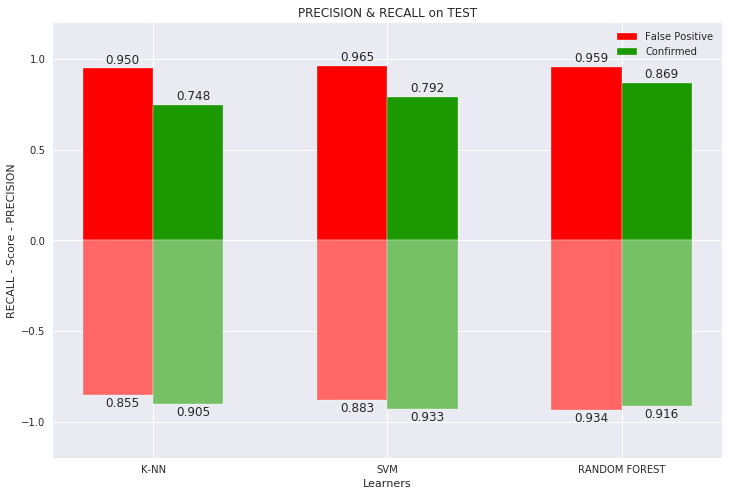

In [129]:
fig = plt.figure(figsize=(12,8))

#PRECISION SCORES
aux = list(map(list, zip(*p_test))) #transpose
plt.bar(M-0.15, aux[0], width=0.3,facecolor='#ff0000', edgecolor='white',label="False Positive")
plt.bar(M+0.15, aux[1], width=0.3,facecolor='#1C9900', edgecolor='white',label="Confirmed")

#RECALL SCORES
aux = list(map(list, zip(*r_test))) #transpose
plt.bar(M-0.15, np.array(aux[0])*-1, width=0.3,facecolor='#FF6666', edgecolor='white')
plt.bar(M+0.15, np.array(aux[1])*-1, width=0.3,facecolor='#76C166', edgecolor='white')

#ANOTATIONS OF SCORES
for x, (a,b) in zip(M, p_test):
    plt.text(x + 0.02-0.15, a + 0.01, '%.3f' % a, ha='center', va='bottom')#fp
    plt.text(x + 0.02+0.15, b + 0.01, '%.3f' % b, ha='center', va='bottom')#conf
for x, (a,b) in zip(M, r_test):
    plt.text(x + 0.02-0.15, -a - 0.01, '%.3f' % a, ha='center', va='top')#fp
    plt.text(x + 0.02+0.15, -b - 0.01, '%.3f' % b, ha='center', va='top')#conf
        
plt.xticks(M, LABELS)
plt.title("PRECISION & RECALL on TEST")   
plt.xlabel("Learners")  
plt.ylabel("RECALL - Score - PRECISION") 
plt.legend()
plt.ylim(-1.2,1.2)
plt.show()

/users/fmena/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


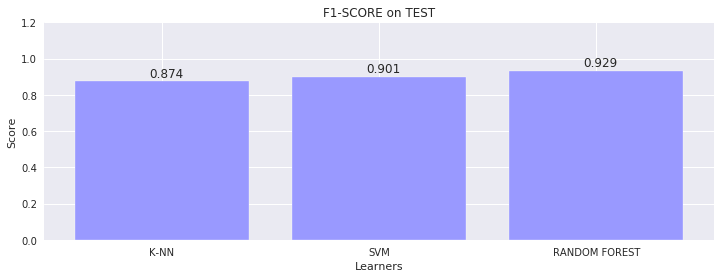

In [130]:
fig = plt.figure(figsize=(12,4))
plt.bar(M, f1_score_test, facecolor='#9999ff', edgecolor='white')

for x, y in zip(M, f1_score_test):
    plt.text(x + 0.02, y + 0.01, '%.3f' % y, ha='center', va='bottom')
    
plt.xticks(np.arange(learners), LABELS)
plt.title("F1-SCORE on TEST")   
plt.xlabel("Learners")  
plt.ylabel("Score") 
plt.ylim(0,1.2)
plt.show() #random forest --all

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.bar(M, f1_score_test, facecolor='#9999ff', edgecolor='white')

for x, y in zip(M, f1_score_test):
    plt.text(x + 0.02, y + 0.01, '%.3f' % y, ha='center', va='bottom')
    
plt.xticks(np.arange(learners), LABELS)
plt.title("F1-SCORE on TEST")   
plt.xlabel("Learners")  
plt.ylabel("Score") 
plt.ylim(0,1.2)
plt.show() #random forest--model